<a href="https://colab.research.google.com/github/jonathan-pap/Data-Analyst-Udacity/blob/main/wrangle_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling Project

## We Rate Dogs

In [ ]:
#importing the required libaries
import pandas as pd
import numpy as np
import os
import tweepy 
import requests
import json
from tweepy import OAuthHandler

#setting to be able to read all text from text column
pd.set_option('display.max_colwidth', -1)

## Gather Data

### Twitter archive

The twitter archive `twitter-archive-enhanced.csv` downloaded from Udacity

In [ ]:
#Load the twitter archive into a datafram
tweets = pd.read_csv('twitter-archive-enhanced.csv', sep=',')
#check twitter_archive dataframe was created
tweets.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [ ]:
tweets.shape

(2356, 17)

### Tweet image predictions

The twitter archive `image_predictions.tsv`
- downloaded from ` https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv`


In [ ]:
#Use request library to gather image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#Check response for file was succesfull and save the file `image-predictions.tsv`
if response.status_code == 200:
    print('Success!', response.status_code)
    file_image = url.split('/')[-1]
    open(file_image, 'wb').write(response.content)
   
elif response.status_code != 200:
    print('Error Occured.')

Success! 200


In [ ]:
#Load the image_predictions into a dataframe
predictions = pd.read_csv(file_image, sep = '\t')
#check image_prediciations dataframe was created
predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Twitter API

Create `tweet_json.txt`.

Query twitter API using Pything code and tweepy for each observation the twitter archive using `tweet_id`

In [ ]:
#twitter api connection
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

# Create the Twitter API object and set rate limit params

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [ ]:
#create empty list to store tweet results
success = []
errors = []

In [ ]:

# For loop which will add each available tweet to a new line of tweet_json.txt
with open('tweet_json.txt', 'w') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
            success.append(tweet_id)
#print error tweets                    
        except Exception as e:
            print(str(tweet_id)+ " _ " + str(e))
            errors.append(tweet_id)


In [ ]:
#print number of captured tweets and errors
print('Total tweets captured: {} \nTotal tweet errors: {}'.format(len(success),len(errors)))

### Read JSON data

read the `tweet_json.txt` and extract data convert to data frame and save as `tweet_info`

In [ ]:
# read data from the json text file, and save to a data frame
tweet_info = []

with open('tweet_json.txt', 'r') as json_file:
    # read the first line 
    line = json_file.readline()
    while line:
        data = json.loads(line)
        #store tweet id
        tweet_id = data['id'] 
        #store retweet count
        retweet_count = data['retweet_count']
        #store favorite coutn
        favorite_count = data['favorite_count']
        #date time tweet created
        #date_time = data['created_at']
              
        # create a dictionary with the data, collected
        tweet_list = {'tweet_id': int(tweet_id),
                      'retweet_count': int(retweet_count), 
                      'favorite_count': int(favorite_count),                      
                     }
        
        tweet_info.append(tweet_list)

        #read next line of the file
        line = json_file.readline()
        

# convert the tweet info to data frame.
api_data = pd.DataFrame(tweet_info, columns = ['tweet_id','retweet_count','favorite_count'])

In [ ]:
 api_data.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7725,36301
1,892177421306343426,5719,31305


In [ ]:
#save api data
api_data.to_csv('tweets.csv', index = False)

**we now have 3 data frames to asses and clean**
- tweets 
- predictions
- api_data

In [ ]:
tweets.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [ ]:
#view sample data from tweets
tweets.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
957,751538714308972544,NaN,NaN,2016-07-08 22:09:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Max. She has one ear that's always slightly more alert than the other. 10/10 wonky af https://t.co/5eJg69G8vY,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/751538714308972544/photo/1,https://twitter.com/dog_rates/status/751538714308972544/photo/1,https://twitter.com/dog_rates/status/751538714308972544/photo/1",10,10,Max,None,None,None,None
331,832998151111966721,NaN,NaN,2017-02-18 17:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Rhino. He arrived at a shelter with an elaborate doggo manual for his new family, written by someone who will always love him. 13/10 https://t.co/QX1h0oqMz0",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/832998151111966721/photo/1,https://twitter.com/dog_rates/status/832998151111966721/photo/1",13,10,Rhino,doggo,None,None,None
681,788765914992902144,NaN,NaN,2016-10-19 15:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Butter. She can have whatever she wants forever. 12/10 would hug softly https://t.co/x5gXRS1abq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788765914992902144/photo/1,12,10,Butter,None,None,None,None
1115,732726085725589504,NaN,NaN,2016-05-18 00:14:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Aldrick. He looks wise af. Also exceptionally fluffy. Only two legs tho (unfortunate). 11/10 would still hug https://t.co/QwiCVLPMNL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732726085725589504/photo/1,11,10,Aldrick,None,None,None,None
624,795464331001561088,NaN,NaN,2016-11-07 03:14:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Elder doggo does a splash. Both 13/10 incredible stuff https://t.co/gBUDjdEcqz,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795464331001561088/video/1,13,10,None,doggo,None,None,None
653,792050063153438720,NaN,NaN,2016-10-28 17:07:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Remus. He's a mop that came to life. Can't see anything. Constantly trips over himself. Still a very good dog. 11/10 https://t.co/S3f1SYylzu,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792050063153438720/photo/1,https://twitter.com/dog_rates/status/792050063153438720/photo/1",11,10,Remus,None,None,None,None
487,814153002265309185,NaN,NaN,2016-12-28 16:56:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oshie. He's ready to party. Bought that case himself. 12/10 someone tell Oshie it's Wednesday morning https://t.co/YIJo7X7K9J,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814153002265309185/photo/1,12,10,Oshie,None,None,None,None
2096,670755717859713024,NaN,NaN,2015-11-29 00:06:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Gin &amp; Tonic. They're having a staring contest. Very very intense. 9/10 for both https://t.co/F6bI9dF16E,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670755717859713024/photo/1,9,10,Gin,None,None,None,None
1426,697881462549430272,NaN,NaN,2016-02-11 20:34:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Carter. He wakes up in the morning and pisses excellence. 10/10 best there is plain and simple https://t.co/pHktDjpFr8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697881462549430272/photo/1,10,10,Carter,None,None,None,None
467,817120970343411712,NaN,NaN,2017-01-05 21:29:55 +0000,"<a href=""http://twitte

In [ ]:
# total missing values features
tweets.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [ ]:
#check for duplicated entries
tweets.duplicated().sum()

0

In [ ]:
# Check if there are any duplicated tweets id
tweets[tweets.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Check name column

In [ ]:
#take a close look at the names with value counts
tweets.name.sort_values()

1035    Abby        
1021    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
144     Albus       
412     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
2238    Alfie       
661     Alfie       
367     Alfie       
1616    Alfie       
858     Alfie       
51      Alfy        
201     Alice       
1701    Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
852     my          
988     not         
335     not         
1747    officially  
1206    old         
993     one         
1936    one         
924     one         
369     one         
2326    quite       
169     quite       
118     quite       
193     quite       
2030    space       
22      such        
2345    the         
2346    the  

In [ ]:
#number of entries with lower case names
tweets.name.str.islower().sum()

109

In [ ]:
#check lower case names
tweets[tweets['name'].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

There are a lot of observations that do not appear to be names for example 'a, such, quite, not' there are a 109 entries.

also expanded url's are missing data will take a closer look.

### Check expanded_urls Columns

In [ ]:
#check null entries for expanded url.
tweets[tweets['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [ ]:
#sum of isna in expanded urls
sum(tweets.expanded_urls.isna())

59

59 entries have null values in `expanded_url`

In [ ]:
#check the expanded urls against reply columns
tweets[(tweets['expanded_urls'].isna()) & (tweets['in_reply_to_status_id'].notnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
218,850333567704068097,8.503288e+17,2.195506e+07,2017-04-07 13:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIENCED MANY THINGS. PROBABLY LOST OTHER EAR DOING SOMETHING HEROIC. 13/10 HUG THE DOG HOPPUS,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


In [ ]:
#how many entries have no extented url &  have id in the reply status id.
sum(tweets.expanded_urls.isna() & tweets.in_reply_to_status_id.notnull())

55

In [ ]:
#how many entries have no extented url &  and are retweets.
sum(tweets.expanded_urls.isna() & tweets.retweeted_status_id.notnull())

1

In [ ]:
#check entries that have no extended url and reply status is nan.
tweets[(tweets['expanded_urls'].isna()) & (tweets['in_reply_to_user_id'].isna())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


From the above assemnet we can concluded that those of extended urls with non values are as follows we will remove these colums as its not needed for my analysis, only original tweets are required.
- 55 observations are replies
- 1 observation is retweet
- 3 are possible valid entries

In [ ]:
#how many observations are retweets
sum( tweets.retweeted_status_id.notnull())

181

In [ ]:
tweets[(tweets['retweeted_status_id'].notnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

There are 181 retweets

### Check source Columns

In [ ]:
#Check value of the `source`
tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

The source column is difficult to read. we can clean this up be more readable

intersting to see what on the text field contians.

In [ ]:
tweets['text'].sample(6)

2089    Two obedient dogs here. Left one has extra leg sticking out of its back. They each get 9/10. Would pet both at once https://t.co/RGcNPsmAfY                  
934     Here we are witnessing an isolated squad of bouncing doggos. Unbelievably rare for this time of year. 11/10 for all https://t.co/CCdlwiTwQf                  
368     This is Fiona. She's an exotic dog. Seems rather impatient. Jaw extension on another level tho. Looks slippery. 10/10 would still pet https://t.co/vst2SEVJO3
1963    *lets out a tiny screech and then goes into complete cardiac arrest* 12/10 https://t.co/az5PLGzVNJ                                                           
403     This is Nala. She got in trouble. One h*ck of a pupnishment. Still 11/10 would pet https://t.co/EmJbG0skLt                                                   
1290    Please stop sending in non canines like this Guatemalan Twiggle Bunny. We only rate dogs. Only send in dogs... 11/10 https://t.co/XKhobeGuvT                 
Name

we can see that the column contains name, also a tiny url, and the denominator and numerator. could be classed as quality issue will document these

- url in text
- denominator and numerator
- also the there are refernces to the dog stage for example pupper, puppo

In [ ]:
#check statistics
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


we could argue that tweet IDs should be str type as this as key in the dataframe and no calculations will be performed.
there are entries for the denominator to be above 10, this is incorrect.

In [ ]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


changes for the predictions table is
- column headings more meaningfull
- correct p1,p2,p3 dog breeds to be more consistent.

In [ ]:
api_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7725,36301
1,892177421306343426,5719,31305
2,891815181378084864,3786,23572
3,891689557279858688,7889,39605
4,891327558926688256,8506,37818


In [ ]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


### Assess

#### Quality
##### tweets table
* `Expanded URL`: Missing data - Make the data complete
* `Retweets & Replies`:	Unneeded data for analysis - Drop observations
* `Remove unneeded columns of retweets & replies`: Unneeded columns - Drop columns
* `Name`: column Not clear definition - Rename to be more meaningful
* `Incorrect / none names`:	Some values are not names - Replace with None
* `Timestamp`: Incorrect data type -	Make correct data type
* `Denominator`: Incorrect entries - Replace incorrect entries
* `Source`:	Unreadable - Remove junk from columns

##### predictions table
* Column`: names in predictions table	Not meaningful - Make more meaningful
* `Dog breeds`:	Mixup lower case, and formatted	Format -  text and remove formating
* `Dog breeds`: should be catergory


#### Tidiness
##### archive table
* `doggo, floofer, pupper, puppo` 4 columns for one variable, 

* `tweet_table & api_data & predicitions` to be merged.
    




# Cleaning

#### Creat Copies of dataframes



In [ ]:
#create copies of dataframes 
tweets_clean = tweets.copy()
predictions_clean = predictions.copy()
api_data_clean = api_data.copy()

# Quality

### Missing Data

expanded_urls are made up of basic url https://twitter.com/dog_rates/status/ & `tweet_id` we can concant both columns

example link.
https://twitter.com/dog_rates/status/828361771580813312

In [ ]:
#create variable iwth the twitter url
url = 'https://twitter.com/dog_rates/status/'
#create variable of tweet id as str type
t_id = tweets_clean.tweet_id.astype(str)
#replace values in expanded url column
tweets_clean['expanded_urls']= url + t_id

In [ ]:
#check that what remains is correct
print('missing urls: ',sum(tweets_clean.expanded_urls.isna()))

missing urls:  0


In [ ]:
#verify replacements
tweets_clean.expanded_urls.sample(3)

2166    https://twitter.com/dog_rates/status/669363888236994561
1258    https://twitter.com/dog_rates/status/710283270106132480
786     https://twitter.com/dog_rates/status/774757898236878852
Name: expanded_urls, dtype: object

In [ ]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# Quality

### 1. Drop observations that are replies
tweets dataframe containg retweet data we are only intersting in original tweets.
* `n_reply_to_status_id, in_reply_to_user_id` reply data

#### Code

In [ ]:
#drop rows that have null value for extended url and are replies
tweets_clean.drop(tweets_clean.loc[tweets_clean['in_reply_to_status_id']>0].index, inplace=True)

In [ ]:
# check onservations have beenw removed.
print('original dataset of tweets observatios : {} clean dataset of tweets observation : {}'.format(tweets.shape[0],tweets_clean.shape[0]))
print('total observation deleted: ',tweets.shape[0] - tweets_clean.shape[0])
print('observation that remain: ',sum(tweets_clean.expanded_urls.isna()))

original dataset of tweets observatios : 2356 clean dataset of tweets observation : 2278
total observation deleted:  78
observation that remain:  0


In [ ]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2278 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(4), int64(3), obje

### 2. Drop observations that are retweets
remove from tweets dataframe containing retweet data, we are only intersted in original tweets
* `retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp' dataset containt retweets` retweet data.
#### Code

In [ ]:
#drop rows that and are retweets
tweets_clean.drop(tweets_clean.loc[tweets_clean['retweeted_status_id']>0].index, inplace=True)

#### Test

In [ ]:
#check there are no more observations with retweet data
print(sum(tweets_clean.retweeted_status_id.notnull()))

0


In [ ]:
tweets_clean.info()

### 3. Drop unneeded columns
remove from tweets dataframe containing retweet data, columns not needed
* `retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp`

* `n_reply_to_status_id, in_reply_to_user_id`
#### Code

In [ ]:
#drop uneeded columns
tweets_clean.drop(columns=['in_reply_to_status_id',
                           'in_reply_to_user_id',
                           'retweeted_status_id',
                           'retweeted_status_user_id',
                           'retweeted_status_timestamp'],
                  axis = 1, inplace = True)

In [ ]:
#check if correct have been dropped.
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### 4. Rename dog name column
rename `name`column to be more meaningfull
#### Code


In [ ]:
#renanme name to dog_name
tweets_clean.rename({'name': 'dog_name'}, axis='columns', inplace=True)

#### Test

In [ ]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
dog_name              2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### 5. Incorect names
replace lower case names with No name
#### Code

In [ ]:
# use regex capture characters lower case a-z [a-z] capture all.*  and replace
tweets_clean.replace({'dog_name': r'^[a-z].*'}, {'dog_name': 'None'}, regex=True, inplace=True)
# Replace 'No name' with NaN value
tweets_clean.dog_name = tweets_clean.dog_name.replace('None', np.nan)
#tweets_clean["dog_name"].fillna("None", inplace = True) 

#### Test

In [ ]:
print('incorect names',tweets_clean.dog_name.str.islower().sum())

incorect names 0


In [ ]:
tweets_clean.dog_name

0       Phineas 
1       Tilly   
2       Archie  
3       Darla   
4       Franklin
5       NaN     
6       Jax     
7       NaN     
8       Zoey    
9       Cassie  
10      Koda    
11      Bruno   
12      NaN     
13      Ted     
14      Stuart  
15      Oliver  
16      Jim     
17      Zeke    
18      Ralphus 
20      Gerald  
21      Jeffrey 
22      NaN     
23      Canela  
24      NaN     
25      NaN     
26      Maya    
27      Mingus  
28      Derek   
29      Roscoe  
31      Waffles 
         ...    
2326    NaN     
2327    NaN     
2328    NaN     
2329    NaN     
2330    NaN     
2331    NaN     
2332    NaN     
2333    NaN     
2334    NaN     
2335    NaN     
2336    NaN     
2337    NaN     
2338    NaN     
2339    NaN     
2340    NaN     
2341    NaN     
2342    NaN     
2343    NaN     
2344    NaN     
2345    NaN     
2346    NaN     
2347    NaN     
2348    NaN     
2349    NaN     
2350    NaN     
2351    NaN     
2352    NaN     
2353    NaN   

In [ ]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
dog_name              1390 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### 6. Incorrect Data Type
replace lower case names with nan
#### Code

In [ ]:
#convert timestamp column to pandas datetime data type
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])

#### Test

In [ ]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
dog_name              1390 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### 7. Correct Denominator
the denomoninator should be a value of 10,  replace values with 10.

#### Code

In [ ]:
tweets_clean['rating_denominator']=int(10)

#### Test

In [ ]:
tweets_clean.rating_denominator.describe()

count    2097.0
mean     10.0  
std      0.0   
min      10.0  
25%      10.0  
50%      10.0  
75%      10.0  
max      10.0  
Name: rating_denominator, dtype: float64

### 8. source more readable
correct values in source column to be more readable. extract key words
* iPhone, Twitter Web, Vine, TweetDeck

#### Code

In [ ]:
tweets_clean.source.unique()

array(['iPhone', 'Twitter Web', 'Vine', 'TweetDeck'], dtype=object)

In [ ]:
#replace if string contains iphone,
tweets_clean.loc[tweets_clean['source'].str.contains('iPhone'), 'source'] = 'iPhone'
#replace if string contains twitter web client,
tweets_clean.loc[tweets_clean['source'].str.contains('Twitter Web'), 'source'] = 'Twitter Web'
#replace if string contains Vine,
tweets_clean.loc[tweets_clean['source'].str.contains('Vine'), 'source'] = 'Vine'
#replace if string contains twitter web client,
tweets_clean.loc[tweets_clean['source'].str.contains('Tweet'), 'source'] = 'TweetDeck'

In [ ]:
tweets_clean.source.value_counts()

iPhone         1964
Vine           91  
Twitter Web    31  
TweetDeck      11  
Name: source, dtype: int64

### 9. Predictions table dog breed
Dog breeds make the text more consistent ust the `str.title` function and remove `_` for space
#### Code

In [ ]:
#function for removing and correct formating
def breed (column):
    column = column.str.title()
    column = column.str.replace('_',' ')
    return column

In [ ]:
#pass each column to be cleaned
predictions_clean.p1 = breed(predictions_clean.p1)
predictions_clean.p2 = breed(predictions_clean.p2)
predictions_clean.p3 = breed(predictions_clean.p3)

In [ ]:
predictions_clean[['p1','p2','p3']]


,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog
6,Box Turtle,Mud Turtle,Terrapin
7,Chow,Tibetan Mastiff,Fur Coat
8,Shopping Cart,Shopping Basket,Golden Retriever
9,Miniature Poodle,Komondor,Soft-Coated Wheaten Terrier


### 9. Predictions table column names
Rename all column to be more meaningfull.
#### Code



In [ ]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
#select columns and rename.
predictions_clean = predictions_clean.rename(columns = {'jpg_url': 'dog_image',
                                                        'img': 'image_number',
                                                        'p1': 'breed_prediction_1',
                                                        'p2': 'breed_prediction_2',
                                                        'p3': 'breed_prediction_3',
                                                        'p1_conf': 'prediction_confidence_1',
                                                        'p2_conf': 'prediction_confidence_2',
                                                        'p3_conf': 'prediction_confidence_3',
                                                        'p1_dog': 'prediction_1',
                                                        'p2_dog': 'prediction_2',
                                                        'p3_dog': 'prediction_3',
                                                       })

#### Test

In [ ]:
predictions_clean.columns

Index(['tweet_id', 'dog_image', 'img_num', 'breed_prediction_1',
       'prediction_confidence_1', 'prediction_1', 'breed_prediction_2',
       'prediction_confidence_2', 'prediction_2', 'breed_prediction_3',
       'prediction_confidence_3', 'prediction_3'],
      dtype='object')

# Tidiness

### 1. one variable in 4 columns
combine coulms doggo / flooer / pupp /puppo to one column

#### Code

In [ ]:
# create new column and extraxt 'dog_stage' values from tweet text.
tweets_clean['dog_stage'] = tweets_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
# check values in new column
tweets_clean.dog_stage = tweets_clean.dog_stage.astype('category')

#drop uneeded columns
tweets_clean.drop(columns=['doggo','floofer','pupper','puppo'],
                  axis = 1, inplace = True)

#### Test

In [ ]:
tweets_clean.dog_stage.value_counts()

pupper     240
doggo      80 
puppo      29 
floofer    4  
Name: dog_stage, dtype: int64

In [ ]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
dog_name              1390 non-null object
dog_stage             353 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(4)
memory usage: 149.7+ KB


### 2. Merge Tables
combine tables using merge function

#### Code

In [ ]:
tweet_master = pd.merge(tweets_clean, api_data_clean, on = 'tweet_id', how = 'inner')
tweet_master = pd.merge(tweet_master, predictions_clean, on = 'tweet_id', how = 'inner')

#### Test

In [ ]:
tweet_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,...,img_num,breed_prediction_1,prediction_confidence_1,prediction_1,breed_prediction_2,prediction_confidence_2,prediction_2,breed_prediction_3,prediction_confidence_3,prediction_3
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193,13,10,Phineas,NaN,7725,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426,13,10,Tilly,NaN,5719,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,NaN,3786,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,NaN,7889,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,NaN,8506,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [ ]:
tweet_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 22 columns):
tweet_id                   1964 non-null int64
timestamp                  1964 non-null datetime64[ns]
source                     1964 non-null object
text                       1964 non-null object
expanded_urls              1964 non-null object
rating_numerator           1964 non-null int64
rating_denominator         1964 non-null int64
dog_name                   1342 non-null object
dog_stage                  320 non-null category
retweet_count              1964 non-null int64
favorite_count             1964 non-null int64
dog_image                  1964 non-null object
img_num                    1964 non-null int64
breed_prediction_1         1964 non-null object
prediction_confidence_1    1964 non-null float64
prediction_1               1964 non-null bool
breed_prediction_2         1964 non-null object
prediction_confidence_2    1964 non-null float64
prediction_2              

In [ ]:
tweet_master.to_csv('twitter_archive_master.csv', index=False)

# Analyis

## Questions

1. Most common Tweeting source?
2. Retweets vs Favoirtes?
3. Most commong Dog Name?
4. Most common dog name by favorite count?
5. Most common breed & name ?

In [ ]:
df = pd.read_csv('twitter_archive_master.csv')
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'darkgrid')

%matplotlib inline

In [ ]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'dog_stage',
       'retweet_count', 'favorite_count', 'dog_image', 'img_num',
       'breed_prediction_1', 'prediction_confidence_1', 'prediction_1',
       'breed_prediction_2', 'prediction_confidence_2', 'prediction_2',
       'breed_prediction_3', 'prediction_confidence_3', 'prediction_3'],
      dtype='object')

## Tweet source

Text(0.5,1,'The Distribution of Source')

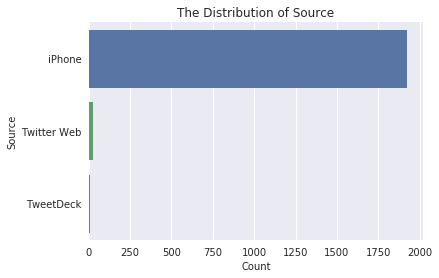

In [ ]:
# sort source by most frequent 
source_data  = df['source'].value_counts().index
sns.countplot(data = df, y = 'source', order = source_data)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Source', fontsize=10)
plt.title('The Distribution of Source',fontsize=12)

Most commone source for tweets is the use of the iPhone

## Retweets / favorites

Text(0.5,1,'reweets counts Vs favorite counts')

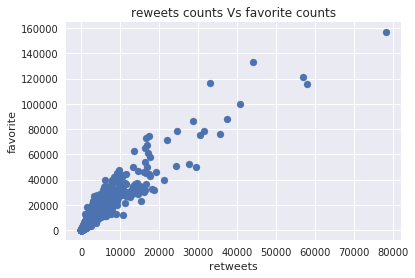

In [ ]:
plt.scatter(df['retweet_count'], df['favorite_count'])
plt.xlabel('retweets')
plt.ylabel('favorite')
plt.title('reweets counts Vs favorite counts')

there is correleation beetween the number and retweets and a favoirtes tweets get, there are also a few extremes. 

## Most common dog name?



Charlie    10
Oliver     10
Cooper     10
Penny      9 
Lucy       9 
Name: dog_name, dtype: int64


Text(0.5,1,'most popular dog names')

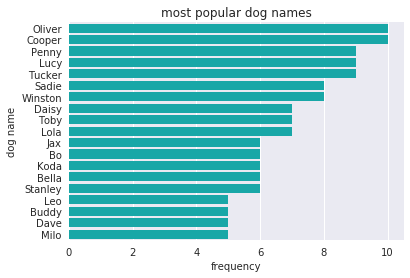

In [ ]:
# check values counts for nan
print(df.dog_name.value_counts().head(5))
#capture the top 10 names of dogs exluded nan and plot.
name  = df['dog_name'].value_counts().index[1:20]
sns.countplot(data = df, y = 'dog_name', order = name, color="c")
plt.xlabel('frequency', fontsize=10)
plt.ylabel('dog name', fontsize=10)
plt.title('most popular dog names',fontsize=12)

In [ ]:
#filter out all tweets with no dog name
df_name = df[df.dog_name != 'None']
#group dataframe by dog_name
df_name = df.groupby(['dog_name'])
#sum up all favorites counts
df_name = df_name['favorite_count'].sum()
#sort high to low
df_name = df_name.sort_values(ascending = False)
#take the top 10 endtries
top_name = df_name[1:11]

Text(0.5,1,'dog name by most favorited')

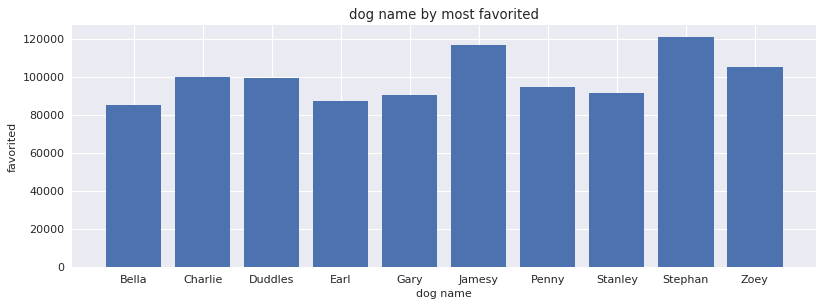

In [ ]:
#plot the most favorited dog name.
plt.figure(figsize=(12,4), dpi=80, edgecolor='k')
plt.bar(top_name.index, top_name)
plt.xlabel('dog name', fontsize=10)
plt.ylabel('favorited', fontsize=10)
plt.title('dog name by most favorited',fontsize=12)

## Most popular dog breed ?

Golden Retriever      137
Labrador Retriever    92 
Pembroke              88 
Chihuahua             78 
Pug                   54 
Chow                  41 
Samoyed               39 
Pomeranian            38 
Toy Poodle            36 
Malamute              29 
Name: breed_prediction_1, dtype: int64


Text(0.5,1,'most popular dog breeds')

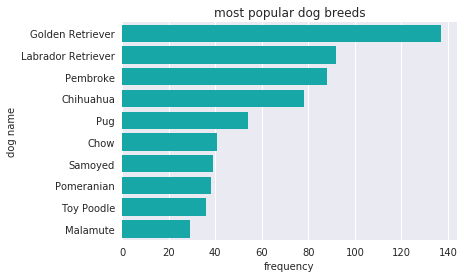

In [ ]:
#filter dataset based on first predictio == true
df_breed = df.query('prediction_1 == True')

#print value counts
print(df_breed.breed_prediction_1.value_counts().head(10))
#capture the top 10 breeds of dogs.
breed  = df_breed['breed_prediction_1'].value_counts().index[:10]
sns.countplot(data = df_breed, y = 'breed_prediction_1', order = breed, color="c")
plt.xlabel('frequency', fontsize=10)
plt.ylabel('dog name', fontsize=10)
plt.title('most popular dog breeds',fontsize=12)

What see is that most common dog breed is the Golden retreiver.

## What is the most favorited breed?

In [ ]:
#Favorited breed
df_fbreed = df_breed
#group dataframe by dog_name
df_fbreed = df_fbreed.groupby(['breed_prediction_1'])
#sum up all favorites counts
df_fbreed = df_fbreed['favorite_count'].sum()
#sort high to low
df_fbreed = df_fbreed.sort_values(ascending = False)
#take the top 10 endtries
top_breed = df_fbreed[:11]
top_breed

breed_prediction_1
Golden Retriever      1581069
Labrador Retriever    988345 
Pembroke              931986 
Chihuahua             643037 
Samoyed               480943 
French Bulldog        438363 
Chow                  380600 
Pug                   292594 
Cocker Spaniel        289066 
Pomeranian            285116 
Eskimo Dog            244661 
Name: favorite_count, dtype: int64

Text(0.5,1,'dog name by most favorited')

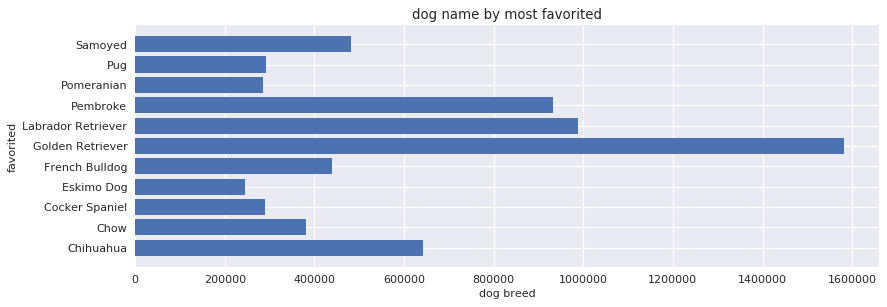

In [ ]:
#plot the most favorited dog name.
plt.figure(figsize=(12,4), dpi=80, edgecolor='k')
plt.barh(top_breed.index, top_breed)
plt.xlabel('dog breed', fontsize=10)
plt.ylabel('favorited', fontsize=10)
plt.title('dog name by most favorited',fontsize=12)

## What is the most favorited breed and dog name

In [ ]:
df_fav= df
#group name and bread aggregate on favorite count
df_fav = df_fav.groupby(['breed_prediction_1', 'dog_name']).agg({'favorite_count': 'sum'})
df_fav.columns = ['sum']
#df_fav = grouped_multiple.reset_index()
df_fav.sort_values(by='sum', ascending = False).head(10)

,,sum
breed_prediction_1,dog_name,
Chihuahua,Stephan,121020
French Bulldog,Jamesy,116715
English Springer,Duddles,99523
Standard Poodle,Bo,88327
Golden Retriever,Zoey,78730
Bubble,Kenneth,75112
Chesapeake Bay Retriever,Aja,74713
Italian Greyhound,Earl,72543
Golden Retriever,Bella,69891
